### Generación y adecuación de datos sintéticos
* Generación de datos
* Visualización
* Codificación de la salida en one-hot
* Separación de los conjuntos de training y test

Todo utilizando la librería ScikitLearn


In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from sklearn import datasets as skds


Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
X, y = skds.make_classification(n_samples=4000,
   n_features=2,
   n_informative=2, 
   n_redundant=0,  
   n_repeated=0, 
   n_classes=2,
   n_clusters_per_class=1)
print(y[1:6])

[0 0 0 1 0]


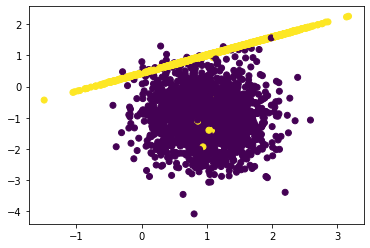

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],marker='o',c=y)
plt.show()

In [4]:
print(y[1:6])
import numpy as np
y=np.eye(2)[y]
print(y[1:6])

[0 0 0 1 0]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = (train_test_split(X, y,test_size=0.20, random_state=17))

print("X_train :", X_train[1:4])
print("y_train :", y_train[1:4])

print("X_test :",X_test[1:4])
print("y_test :",y_test[1:4])

X_train : [[ 0.28108507 -2.09462786]
 [ 0.74568211 -1.32928846]
 [ 0.67801899  0.81395799]]
y_train : [[1. 0.]
 [1. 0.]
 [0. 1.]]
X_test : [[ 1.36033874 -0.32641063]
 [ 0.42691331 -0.74637458]
 [ 0.8645093  -0.63177703]]
y_test : [[1. 0.]
 [1. 0.]
 [1. 0.]]


### Definiendo variables y parámetros necesarios

Tenemos la función que necesitamos entrenar es: y = wx + b

Para ello vamos a definir todas las variables necesarias como las entradas


   

In [6]:
nIn = X_train.shape[1]
nOut = y_train.shape[1]
print(nIn)
print(nOut)

2
2


In [7]:
tasa_apren = 0.003
tasa_apren


0.003

In [8]:
mix = tf.placeholder(dtype=tf.float32, shape=[None, nIn])
miy = tf.placeholder(dtype=tf.float32, shape=[None, nOut])

w = tf.Variable(tf.zeros([nIn,nOut]), dtype=tf.float32)
b = tf.Variable(tf.zeros([nOut]), dtype=tf.float32)

b[1:3]

<tf.Tensor 'strided_slice:0' shape=(1,) dtype=float32>

###  Definimos el modelo y las funciones de pérdida y optimización
![alt text](modelo.png "modelo")  
 Debemos construir el modelo, para ello montaremos
 * Su definición
 * Funciones de pérdida 

Esto afecta a nuestra función de pérdida complicándola un poco más 
![alt text](imagename.png "formula")

 * Función de optimización


In [9]:
model = tf.nn.sigmoid(tf.matmul(mix,w)+b)

In [10]:
y_tra = tf.constant([6,2,4,2,2,5,5,2] , dtype=tf.float32)
y_ten = tf.constant([5,2,4,1,1,4,6,2], dtype=tf.float32)
sq = tf.square(y_tra - y_ten)
loss = tf.reduce_mean(sq)
sess = tf.Session()
sess.run(loss)



0.625

In [11]:
y_mean = tf.reduce_mean(y_ten)
total_error = tf.reduce_sum(tf.square(y_ten - y_mean))
unexplained_error = tf.reduce_sum(tf.square(y_ten - y_tra))
rs = 1 - tf.div(unexplained_error, total_error) 
sess = tf.Session() 
sess.run(rs)


Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


0.79899496

In [12]:
loss = tf.reduce_mean(-tf.reduce_sum( (miy * tf.log(model)) + ((1 - miy) * tf.log(1 - model)), axis=1))


In [13]:
opt = tf.train.GradientDescentOptimizer(learning_rate=tasa_apren).minimize(loss)


## Entrenando el modelo

 Para entrenar nuestro modelo
 
 * Inicializar variables
 * Calcular la función de optimización
 * Calcular predicciones

In [14]:
sess =tf.Session()

In [15]:
sess.run(tf.global_variables_initializer())
res = sess.run(opt, feed_dict={mix: X_train, miy: y_train})

In [16]:
y_ori = sess.run(tf.argmax(miy,1), feed_dict = {miy:y_test})
y_pred = sess.run(tf.argmax(model,1), feed_dict = {mix:X_test})

In [17]:
bi = sess.run(b, feed_dict = {mix:X_train, miy: y_train})
wi = sess.run(w, feed_dict = {mix:X_train, miy: y_train})

print("Nuestro modelo tiene una pinta y=",wi[1,1],"*x +",bi[1])

Nuestro modelo tiene una pinta y= 0.0014670776 *x + -1.9687495e-05


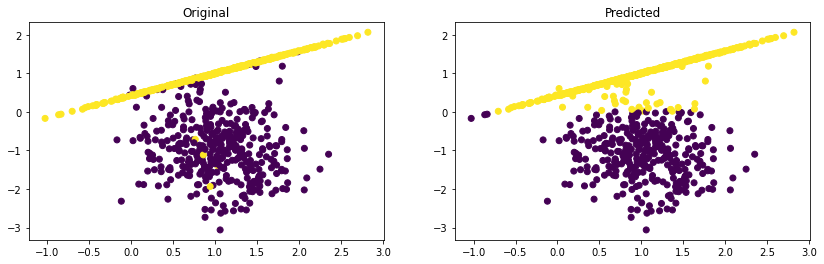

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_ori)
plt.title('Original')
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_pred)
plt.title('Predicted')
plt.show()
